In [1]:
import pandas as pd
import os

## Merging different files of Sales Analysis to a single CSV file

In [2]:
# reading all files from directory
files = [file for file in os.listdir('./Sales_Data/')]

In [3]:
# merging all the files
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
len(all_months_data)

186850

In [5]:
len(all_months_data[all_months_data.isna().all(1)])

545

In [6]:
all_months_data.dropna(inplace=True)

In [7]:
display(len(all_months_data))

display(all_months_data.isna().all(1).sum())
len(all_months_data[all_months_data.isna().all(1)])

186305

0

0

In [8]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
all_months_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [10]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


## Best month of sales and the earning

In [11]:
# adding the month column
Month = all_months_data['Order Date'].str[0:2]
all_months_data.insert(4, 'Month', Month)
all_months_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,09,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [12]:
# dropping nans
drop_nan = all_months_data.dropna(how='all')

In [15]:
all_months_data['Month'] = all_months_data['Month'].astype('int32')
type(all_months_data["Month"])

# it generates error for the first time, but once the below cell is executed after it won't generate any error.

pandas.core.series.Series

In [14]:
# finding 'Or' and deleting
# temp_df = all_months_data[all_months_data['Month'].str[0:2] == 'Or']
# temp_df.tail()

# or we can change the above condition here
all_months_data = all_months_data[all_months_data['Month'].str[0:2] != 'Or']

In [16]:
all_months_data['Month'] = all_months_data['Month'].astype('int32')
type(all_months_data["Month"])

pandas.core.series.Series

In [17]:
all_months_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,9,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,9,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,9,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,9,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,9,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [18]:
type(all_months_data.Month.values)

numpy.ndarray

In [19]:
# changing datatypes of 'Quantity Ordered' and 'Price Each'
all_months_data['Quantity Ordered'] = all_months_data['Quantity Ordered'].astype(int)
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])

In [20]:
display(all_months_data["Quantity Ordered"].dtype)
display(all_months_data['Price Each'].dtype)

dtype('int32')

dtype('float64')

In [21]:
# adding sales column
all_months_data['Sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']

In [22]:
all_months_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address,Sales
11681,259353,AAA Batteries (4-pack),3,2.99,9,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
11682,259354,iPhone,1,700.00,9,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
11683,259355,iPhone,1,700.00,9,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00
11684,259356,34in Ultrawide Monitor,1,379.99,9,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99
11685,259357,USB-C Charging Cable,1,11.95,9,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",11.95


In [23]:
type(all_months_data.Sales.values)

numpy.ndarray

In [24]:
results_sales = all_months_data.groupby('Month').agg('sum')

In [31]:
results_sales['Sales_01'] = results_sales.Sales.astype(int)

In [32]:
results_sales

,Quantity Ordered,Price Each,Sales,Sales_01
Month,,,,
1,10903,1.811768e+06,1.822257e+06,1822256
2,13449,2.188885e+06,2.202022e+06,2202022
3,17005,2.791208e+06,2.807100e+06,2807100
4,20558,3.367671e+06,3.390670e+06,3390670
5,18667,3.135125e+06,3.152607e+06,3152606
6,15253,2.562026e+06,2.577802e+06,2577802
7,16072,2.632540e+06,2.647776e+06,2647775
8,13448,2.230345e+06,2.244468e+06,2244467
9,13109,2.084992e+06,2.097560e+06,2097560


In [33]:
import matplotlib.pyplot as plt
# months = range(1,13)
months = all_months_data['Month'].unique()
months.sort()
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

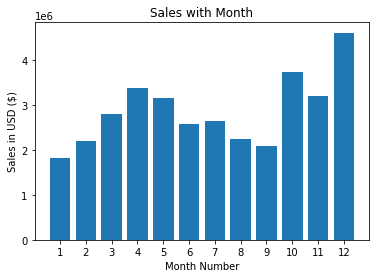

In [34]:
plt.bar(months, results_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.title('Sales with Month')
plt.show()

The best month for the sales can be seen is the December i.e. 12.

## What city have highest number of sales?


In [36]:
# getting city from Perchase address column
all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: x.split(',')[1] 
                                                                    + ' (' + 
                                                                    x.split(',')[2].split(' ')[1] 
                                                                    +')')
# above logic can be performed writing separate functions

In [37]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address,Sales,City
0,176558,USB-C Charging Cable,2,11.95,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,Boston (MA)
3,176560,Google Phone,1,600.00,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,4,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles (CA)


In [38]:
results_sales = all_months_data.groupby('City').sum()
results_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


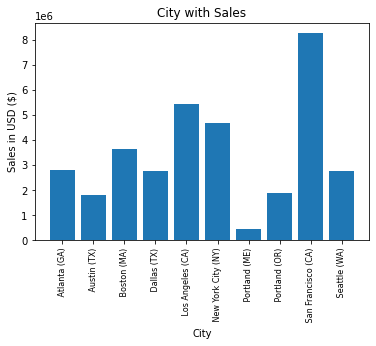

In [39]:
# cities=[city for city, df in all_months_data.groupby('City')]
cities=[city for city,df in all_months_data.groupby('City')]

plt.bar(cities, results_sales['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.title('City with Sales')
plt.xlabel('City')
plt.show()

The San Francisco (CA) has the highest number of sales i.e. 8262204

## What time to display ads to customers to maximize liklihood of customers buying product?

In [40]:
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])

In [41]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address,Sales,City
0,176558,USB-C Charging Cable,2,11.95,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston (MA)
3,176560,Google Phone,1,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles (CA)


In [42]:
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour
all_months_data['Minute'] = all_months_data['Order Date'].dt.minute
# all_months_data.head()

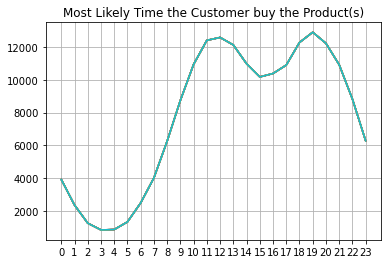

In [43]:
hours = [hour for hour,df in all_months_data.groupby('Hour')]
plt.plot(hours, all_months_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.title('Most Likely Time the Customer buy the Product(s)')
plt.grid()
plt.show()

In [44]:
# all_months_data.groupby(['Hour']).count()

By looking at the graph, right before 11:00 am is a good time to put an ad or  12:00pm. 6:00 pm and 7:00 pm are also good time to display the ads.

## which products are most sold often together?

In [45]:
duplicated_data = all_months_data[all_months_data['Order ID'].duplicated(keep=False)]
duplicated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,4,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,4,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,4,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,Boston (MA),11,31


In [46]:
duplicated_data['Grouped_Product'] = duplicated_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-46-c5ab3d5c54d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_data['Grouped_Product'] = duplicated_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [47]:
duplicated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address,Sales,City,Hour,Minute,Grouped_Product
3,176560,Google Phone,1,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,4,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,4,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,4,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [48]:
duplicated_data = duplicated_data[['Order ID', 'Grouped_Product']].drop_duplicates()
duplicated_data.tail()

,Order ID,Grouped_Product
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,"Google Phone,USB-C Charging Cable"


In [49]:
from itertools import combinations
from collections import Counter

In [50]:
count=Counter()
for row in duplicated_data['Grouped_Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
count.most_common(n=5)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

## What product sold the most and why?

In [51]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles (CA),9,27


In [52]:
all_months_data.groupby('Product')['Quantity Ordered'].sum()
# returns the dataframe

all_months_data.groupby('Product')['Quantity Ordered'].sum().max()
# returns ONLY the number

all_months_data.groupby('Product')['Sales'].sum()

Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: Sales, dtype: float64


AAA Batteries (4-pack) was ordered the most i.e. 31017 times

Macbook Pro Laptop made the highest sales of 8037600.00

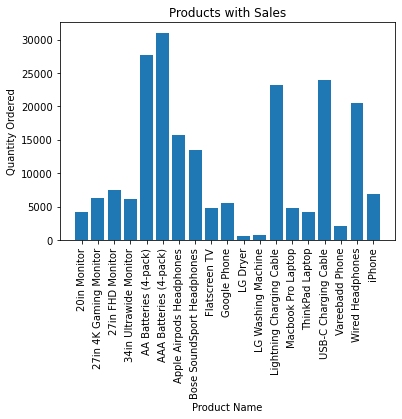

In [53]:
product_group = all_months_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.title('Products with Sales')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product Name')
plt.xticks(products, rotation='vertical', size=10)
plt.show()

In [54]:
# average_prices = all_months_data.groupby('Product').mean()['Price Each']

average_prices = all_months_data.groupby('Product')['Price Each'].mean()
average_prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-55-cd60ee097d31>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=12)


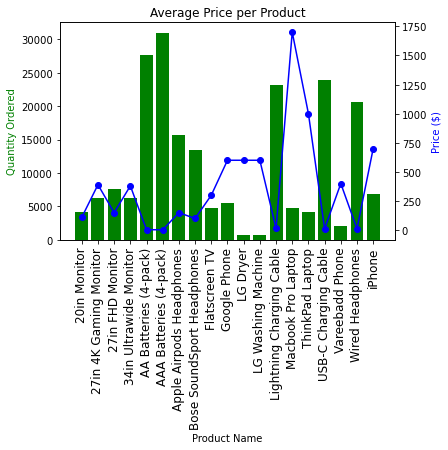

In [55]:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, average_prices, 'b-',marker='o')

plt.title('Average Price per Product')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=12)

plt.show()